<a href="https://colab.research.google.com/github/tkeldenich/Learn_DataScience_Analyze_Forestfires/blob/main/Learn_DataScience_Analyze_Forestfires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science And Environment – How to correctly use EDA for Forestfire**

- [English Article](https://inside-machinelearning.com/en/data-science-and-environment/)
- [French Article](https://inside-machinelearning.com/data-science-et-environnement/)

In this article I propose you to use Data Science to solve Environment issues: we’re going to use EDA to better prevent forest fires.

**Each year, more than 2.8 million hectares of forest are burned by fires in the U.S.**

These fires are caused in specific locations. One can imagine that certain environmental characteristics influence the propagation of fires: temperature, dryness, wind speed, etc.

**But is this really the case?**

In this tutorial we’ll use Exploratory Data Analysis (EDA) to understand what causes the spread of forest fires.

## **Le Dataset forestfires.csv**

### **Forestfires.csv dataset**

We’ll use the [forestfires.csv](https://github.com/tkeldenich/Learn_DataScience_Analyze_Forestfires) dataset that you can find [on this link.](https://github.com/tkeldenich/Learn_DataScience_Analyze_Forestfires)

This dataset gathers the meteorological characteristics of fire starts in Portugal.

Objective of this dataset is to predict the number of hectares burned per fire given the characteristics of the environment.

Once you have [downloaded the dataset](https://github.com/tkeldenich/Learn_DataScience_Analyze_Forestfires), put it in your working environment (Notebook or local).

You can now load the dataset into a Pandas Dataframe and display its dimensions:

In [1]:
import pandas as pd

df = pd.read_csv("forestfires.csv")
df.shape

(517, 13)

517 rows for 13 columns.

**We notice first of all that the dataset is small. Only 517 rows. This can impact our analysis and it is an important information to be aware of.**

Indeed, the larger a dataset is, the more we can generalize the conclusions of this dataset. Conversely for a small dataset.

Now, let’s try to understand the columns of the dataset by displaying their type (int, float, string, …):

In [2]:
df.dtypes

X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Here, I display the type and description of each column:

- X - X coordinates
- Y – Y coordinates
- month – month of the year
- day – day of the week
- FFMC – Fine Fuel Moisture Code
- DMC – Duff Moisture Code – Humus Moisture Index (top soil layer)
- DC – Drought Code – Soil Drought Indicator
- ISI – Initial Spread Index – A numerical estimate of the rate of fire spread
- temp – Temperature in C
- RH – Relative Humidity
- wind – Wind speed in km/h
- rain – Rain in mm/m2
- area – Burned area of the forest (in ha)

Then we can display the first lines of this dataset:

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Now that we have a good overview of our dataset, we can start the EDA with the univariate analysis.

*Note: some people will use `df.describe()` to analyze the whole dataset in one shot. I find this method too heavy for a first analysis. I personally prefer to analyze each feature one by one.*

## **Univariate Analysis**

Univariate analysis is the fact of examining each feature separately.

This will allow us to get a deeper understanding of the dataset.

> Here, we are in the comprehension phase.

**The question associated with the Univariate Analysis is: What is the characteristics of the data that compose our dataset?**

### **Target: Area impacted by fire**

First, let’s analyze the target of this dataset: area impacted by fires.

We use the Seaborn library to display the distribution of our target:

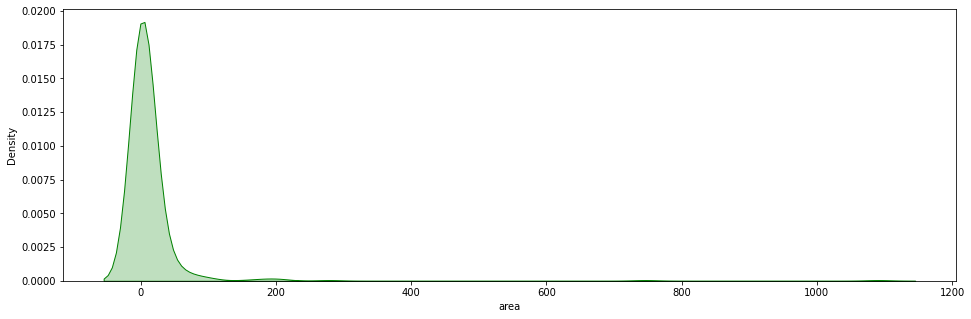

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16,5))
ax = sns.kdeplot(df['area'],shade=True,color='g')
plt.show()

Here we see that most of the forest fires burned less than 100 hectares of forest and that the majority burned 0 hectares.

Let’s push the analysis a little further by using a Tukey box. This will help us to understand the distribution of the target by displaying the median, quartiles, deciles and extreme values:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


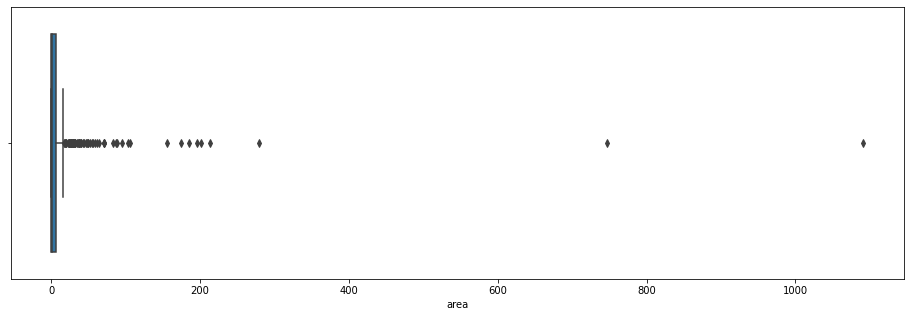

In [5]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(df['area'])
plt.show()

Here it is really difficult to analyze the graph.

Indeed the extreme values are so far from the median that it is impossible to see clearly the Tukey box

We would still like to analyze this box. So, in addition to displaying it, we will zoom in:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


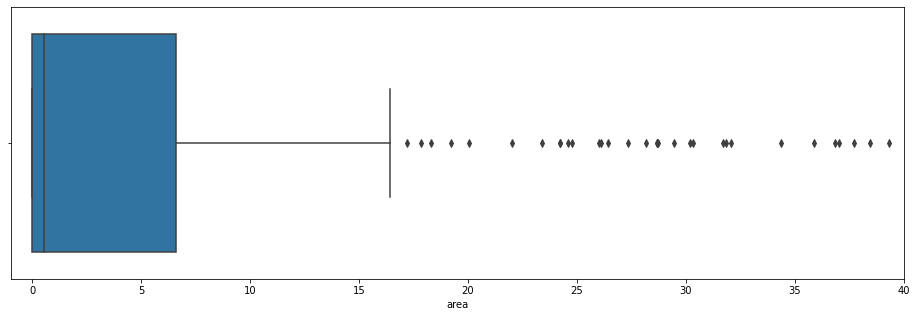

In [6]:
plt.figure(figsize=(16,5))
ax = sns.boxplot(df['area'])
ax.set_xlim(-1, 40)
plt.show()

This is much more readable!

We see here that the mean is between 0 and 1. The third quartile is at 6. And the ninth decile is at 16.

All values above 16 are extreme values. That is to say that very few values are on this scale.

The most extreme values are called “outliers”. We can display [Skewness and Kurtosis](https://inside-machinelearning.com/en/skewness-and-kurtosis/) to evaluate the disparity of these extreme values:

Don’t know what [Skewness and Kurtosis are?](https://inside-machinelearning.com/en/skewness-and-kurtosis/) Feel free to read [our short article on the topic](https://inside-machinelearning.com/en/skewness-and-kurtosis/) to learn more 😉

In [7]:
print("Skew: {}".format(df['area'].skew()))
print("Kurtosis: {}".format(df['area'].kurtosis()))

Skew: 12.846933533934868
Kurtosis: 194.1407210942299


The values of these two metrics are huge! This explains why we had to zoom in our graph.

**Skewness tells us that the majority of the data are on the left and the outliers are on the right.**

**Kurtosis tells us that the data tend to move away from the average.**

This is what we saw on our graph.

> With these two metrics we can understand how much the outliers affect our target.

Let’s now move on to the analysis of these outliers.

#### **Z-Score & Outliers**

As you’ve seen in the Tukey box, there are many extreme values.

But be careful, all these extreme values are not necessarily outliers.

It is indeed normal in any distribution to have extreme values.

**On the other hand, it is uncommon, even anomalous, to have outliers. This may indicate an error in the dataset.**

Therefore, let’s display these outliers to determine if it is an error.

To determine outliers, we use the z-score.

> Z-score calculates the distance of a point from the mean.

**If the z-score is less than -3 or greater than 3, it is considered an outlier.**

Let’s see this by displaying all points below -3 and above 3:

In [8]:
from scipy.stats import zscore

y_outliers = df[abs(zscore(df['area'])) >= 3 ]
y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


We have 4 outliers and good news for us, it seems to be correct data.

**No error in the dataset!**

It means we have a rather peculiar distribution of our target, that must be kept in mind for the rest of the project.

Let’s now move on to the analysis of our features.

### **Categorical data**

In a dataset, several types of data must be differentiated:

- categorical data
- numerical data

The analysis of these two types of data will be different. Therefore, I propose to extract each of them in two sub-Dataframe :

- categorical columns
- numerical columns

With Pandas it’s easy ! You just have to use the select_dtypes function and indicate include='object' for categorical data and exclude='object' for numerical data:

In [9]:
dfa = df.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

cat_columns,num_columns

(['month', 'day'],
 ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'])

We have two categorical data: months and days.

The rest is numerical data.

We can analyze the categorical data directly!

Let’s display their distribution:

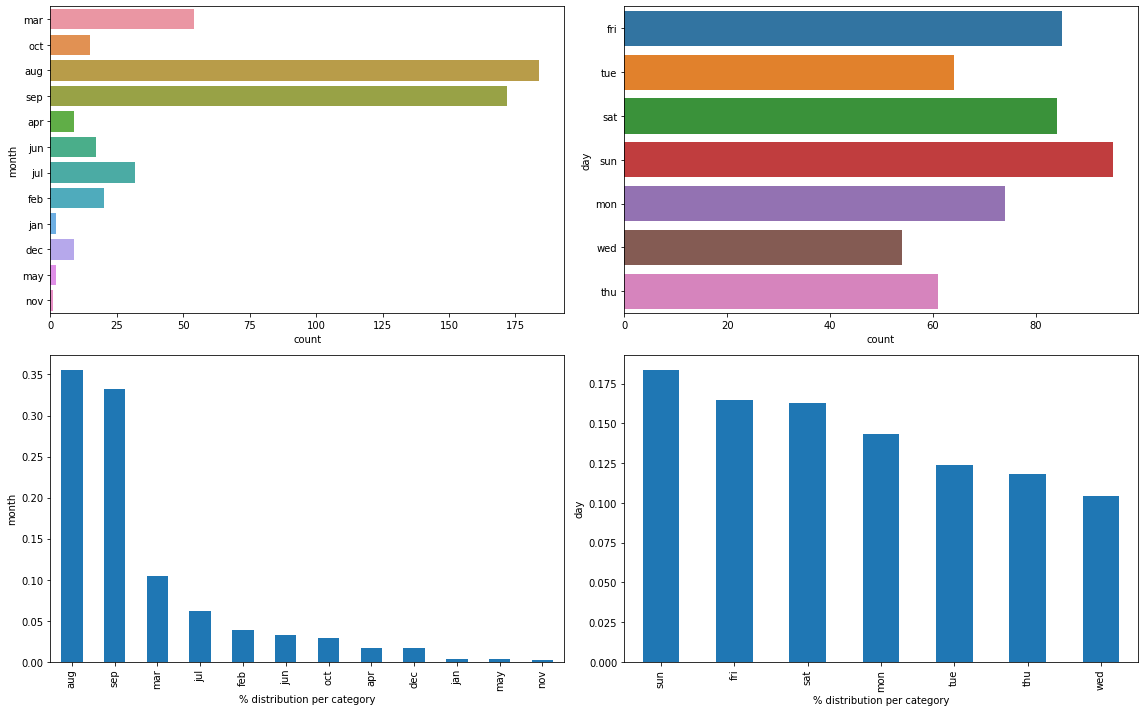

In [10]:
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()  

*Reminder: each row of our dataset represents a forest fire.*

Here, we see that most forest fires occur in August and September. It seems consistent since these are the hottest months of the year.

The distribution according to the days of the week, on the contrary, is more balanced. But we see that Sunday, Saturday, Friday stand out more often than the other days.

The weekend days are therefore the days when there are most often forest fires. This would corroborate the information of the [U.S. Department of Agriculture](https://www.nps.gov/articles/wildfire-causes-and-evaluation.htm) which indicates that 85% of forest fires are caused by human beings. Do we have a similar statistic in Portugal?

### **Numerical data**

Let’s continue our analysis with the numerical data.

Here, the analysis will be the same as with the target :

- understand the distribution
- evaluate the outliers

When we do this kind of analysis, we ask ourselves the question: is there a recurrent pattern in our graph?

Let’s display rain data:

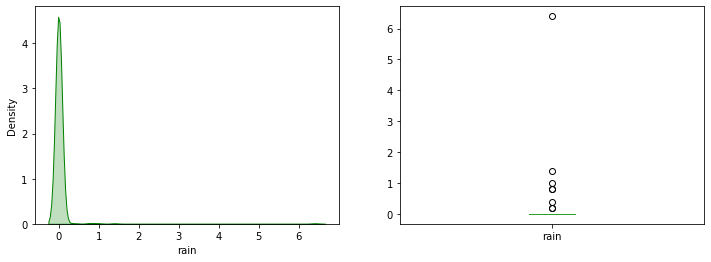

In [11]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['rain'],color='g',shade=True)
plt.subplot(1,2,2)
df['rain'].plot.box()
plt.show()

We see that on fire days, most of the time, there is no rain. This makes sense, as the moisture caused by rain is not favorable to fire.

**In July 2021, the forest fires in Turkey took place when it was 40°C outside**.

Are forest fires related to temperature?

Let’s see now:

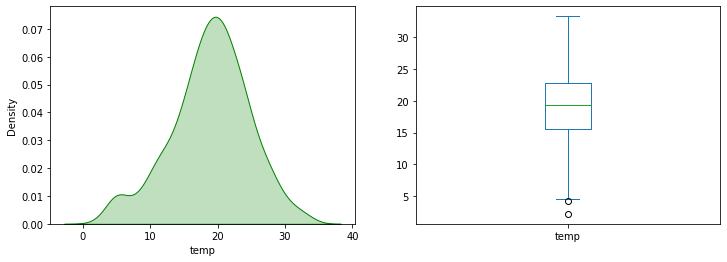

In [12]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(df['temp'],color='g',shade=True)
plt.subplot(1,2,2)
df['temp'].plot.box()
plt.show()

Surprisingly, we see that forest fires in Portugal do not seem to be correlated with the outside temperature. This invalidates our hypothesis.

**I invite you now to try at home to display graphs of the other numerical data.**

You can do it in one shot with this piece of code :

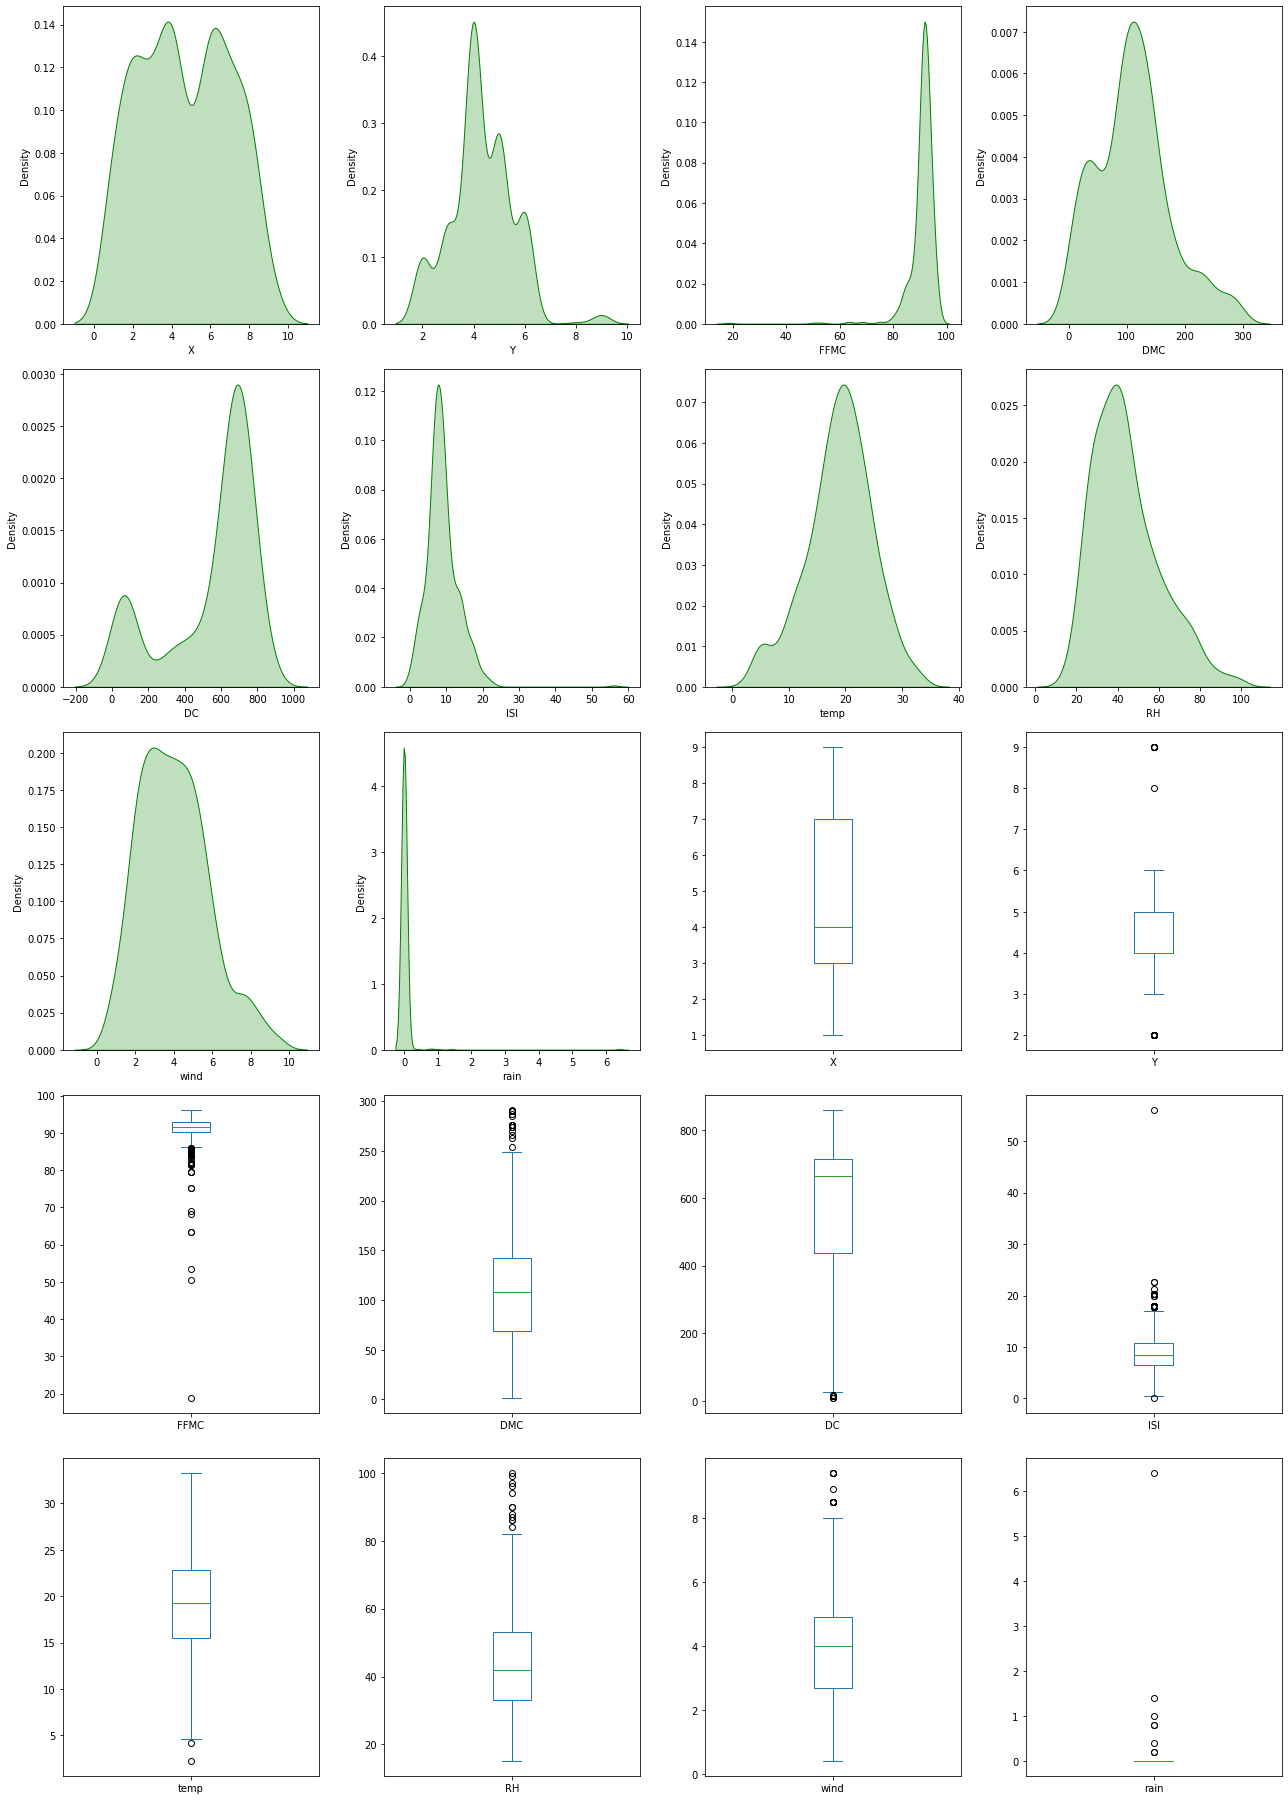

In [13]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = df[num_columns]

The result is not displayed here for lack of space. But the analysis on the FFMC, DMC and DC are particularly interesting!

> There also lies the job of Data Scientists. We are experts in data but we need to understand the indicators that concern our data.

**Go Google to understand what these indicators mean and if the graphical results seem consistent. Give your answer in comments** 😉

Finally we can use Skewness and Kurtosis again to detect our outliers:

In [14]:
pd.DataFrame(data=[df[num_columns].skew(),df[num_columns].kurtosis()],index=['skewness','kurtosis'])

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain
skewness,0.036246,0.417296,-6.575606,0.547498,-1.100445,2.536325,-0.331172,0.862904,0.571001,19.816344
kurtosis,-1.172331,1.420553,67.066041,0.204822,-0.245244,21.458037,0.136166,0.438183,0.054324,421.295964


FFMC, ISI and rain are the 3 columns with an extreme [Skewness and Kurtosis](https://inside-machinelearning.com/en/skewness-and-kurtosis/) value and therefore with outliers.

## **Bivariate Analysis**

Now that we have understood our data thanks to the Univariate Analysis we can continue the project by trying to find links between our features and the area impacted by the forest fires.

**Bivariate Analysis is the examination of each of the features in relation to our target.**

This will allow us to make hypotheses about the dataset.

> Here we are in the theorization phase.

**The question associated with Bivariate Analysis is: Is there a link between our features and the target?**

If there is a linear relationship, for example between FFMC and our target, then we can easily predict the impacted area.

Indeed, if the more the FFMC increases, the larger the impacted area is, it will be easy to draw a linear relationship between these two data. And therefore to predict the target!

But will it be that simple?

Let’s see that now!

### **Categorical features**

First of all I propose to modify our target. In addition to having numerical data specifying the impacted area, it would be nice to have categorical data to perform other analyses.

If the impacted area is 0 ha, we indicate “No damage”, if it is less than 25 “Moderate damage”, less than 100, “High”, more than 100 “Very high”:



In [15]:
def area_cat(area):
    if area == 0.0:
        return "No damage"
    elif area <= 25:
        return "moderate"
    elif area <= 100:
        return "high"
    else:
        return "very high"

df['damage_category'] = df['area'].apply(area_cat)
df.sample(frac=1).head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,damage_category
138,9,9,jul,tue,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,0.36,moderate
410,6,3,feb,fri,84.1,7.3,52.8,2.7,14.7,42,2.7,0.0,0.00,No damage
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,moderate
315,3,4,sep,wed,91.2,134.7,817.5,7.2,18.5,30,2.7,0.0,0.00,No damage
312,2,4,sep,sun,50.4,46.2,706.6,0.4,12.2,78,6.3,0.0,0.00,No damage


As you can see here, we have not removed the “area” column. We have simply added a column that will allow us to perform different types of analysis.

We can use this new column by comparing it to our “month” and “day” categorical data:

<Figure size 1080x2160 with 0 Axes>

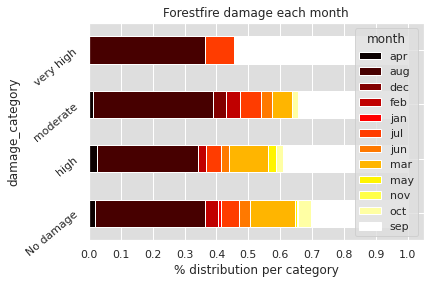

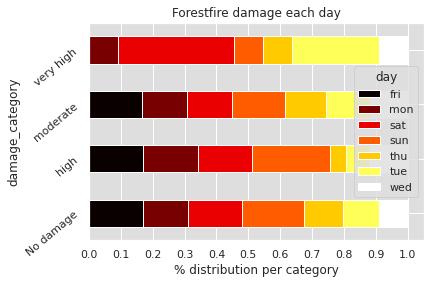

In [16]:
import numpy as np

plt.figure(figsize=(15,30))
sns.set(rc={'axes.facecolor':'#DEDEDE', 'figure.facecolor':'white'})
for col in cat_columns:
    cross = pd.crosstab(index=df['damage_category'],columns=df[col],normalize='index')
    cross.plot.barh(stacked=True,rot=40,cmap='hot')
    plt.xlabel('% distribution per category')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.title("Forestfire damage each {}".format(col))
plt.show()

On the first graph, we can see at what time of the year the most devastating fires occur. Most of them occur in September, August and a small part in July.

In the Univariate Analysis, we saw that **there is a correlation between month of the year and forest fires.** Here we deepen this analysis: **there seems to be a correlation between month of the year and surface impacted by forest fires.**

Concerning the days of the year, we can see that the area impacted does not seem to depend particularly on them.

In the Univariate Analysis, we saw that it is during the weekend days that forest fires occur most often. Nevertheless, this does not seem to impact the area burned by forest fires. The latter is surely more impacted by the weather and environmental conditions than by the days of the week.

### **Numerical features**

To display the previous graph, we have modified the basic configurations of Matplotlib with `sns.set(rc={'axes.facecolor':'#DEDEDE', 'figure.facecolor':'white'})`.

Let’s reset them :

In [17]:
import matplotlib
matplotlib.rc_file_defaults()

We can continue our analysis.

Is there a link between the wind speed and the surface impacted by forest fires?

As wind can participate in fire propagation, this is a significant analysis to do:

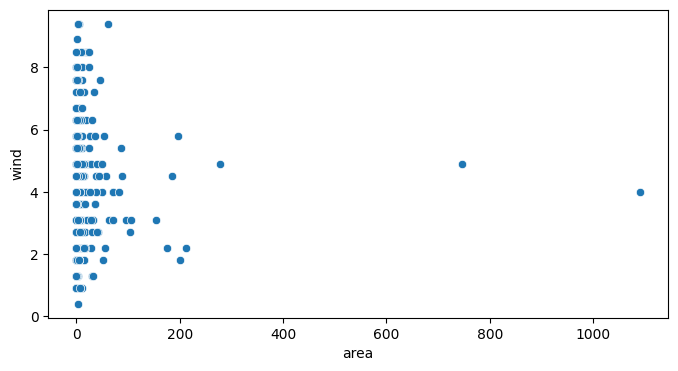

In [18]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='area',y='wind')
plt.show()

Here we have taken the numerical target data. We put them in relation with the wind speed. Nevertheless, we do not see any relation between these two data.

**As for the Univariate Analysis, I invite you to repeat this analysis on all our numerical data.**

This piece of code will help you to do it in one shot:

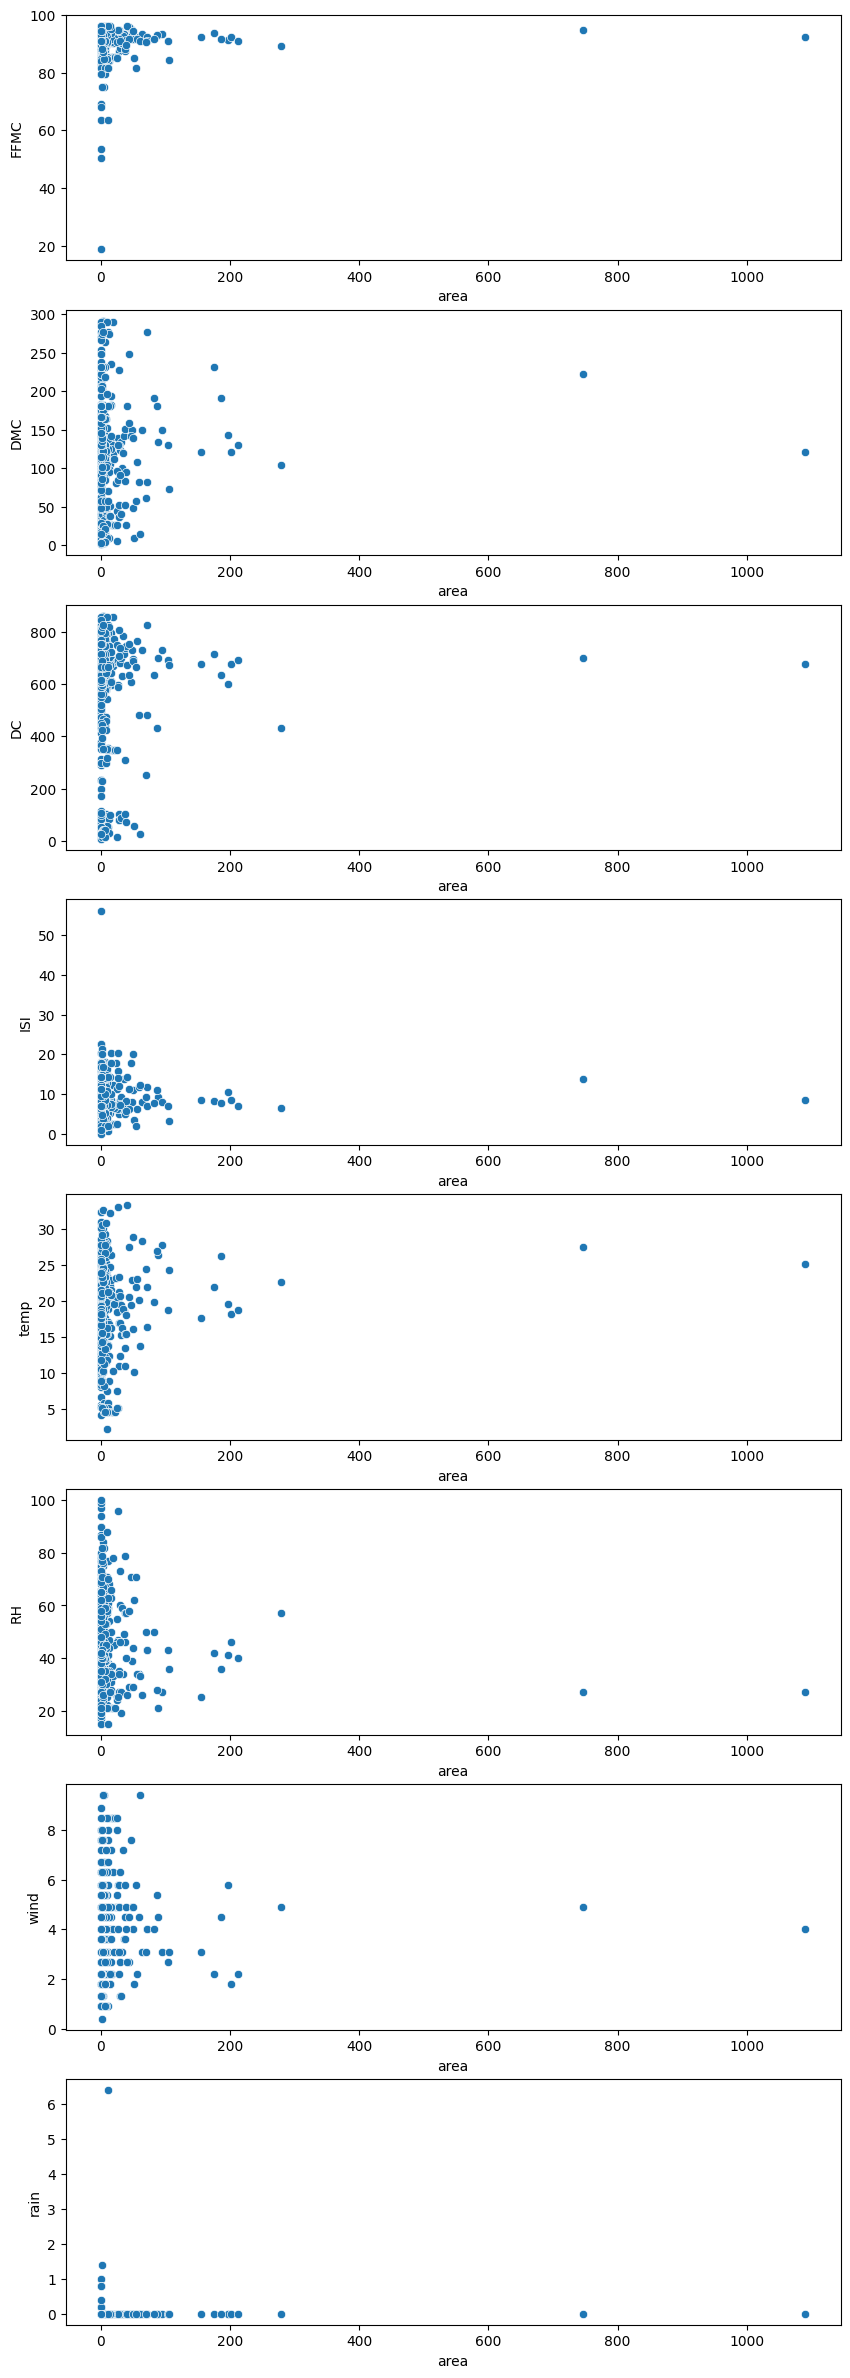

In [19]:
plt.figure(figsize=(10,30))
acc = 1
for i,col in enumerate(num_columns,1):
    if col not in ['X','Y']:
      plt.subplot(8,1,acc)
      sns.scatterplot(data=df,x='area',y=col)
      acc += 1
plt.show()

Display the result to try to find a correlation!

### **Pearson & Heatmap formula**

The result of the graphical analysis is inconclusive. We can’t see any correlation between our numerical features and the target.

**Is this really the case?**

> We can calculate mathematically a correlation between two data thanks to the [Pearson Formula.](https://inside-machinelearning.com/en/pearson-formula-in-python-linear-correlation-coefficient/)

If you are interested in the subject, we have explained in detail in [this short article](https://inside-machinelearning.com/en/pearson-formula-in-python-linear-correlation-coefficient/) what the [Pearson Formula is and how to interpret it.](https://inside-machinelearning.com/en/pearson-formula-in-python-linear-correlation-coefficient/)

With Pandas and Seaborn we can easily calculate this correlation with the function `sns.heatmap(df.corr())`:

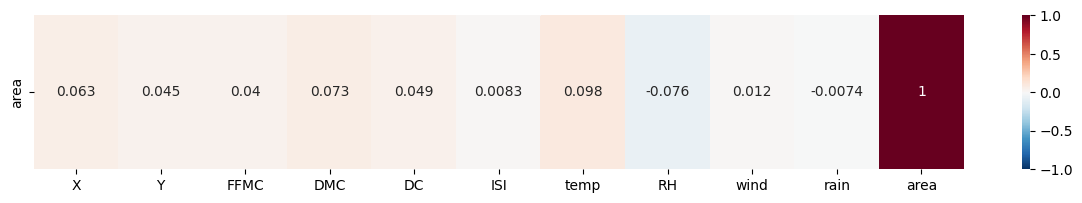

In [20]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr().iloc[[-1]],
            cmap='RdBu_r',
            annot=True,
            vmin=-1, vmax=1)

We call this a heatmap and we could display it for the whole dataset. For example to calculate the correlation between FFMC and DMC. But here we are interested in knowing if there is a correlation between our features and our target.

**The graphical result seems to be verified by the [Pearson Formula](https://inside-machinelearning.com/en/pearson-formula-in-python-linear-correlation-coefficient/): there is no correlation between the numerical features and our target.**

Here is the piece of code that will display the heatmap for the whole dataset:

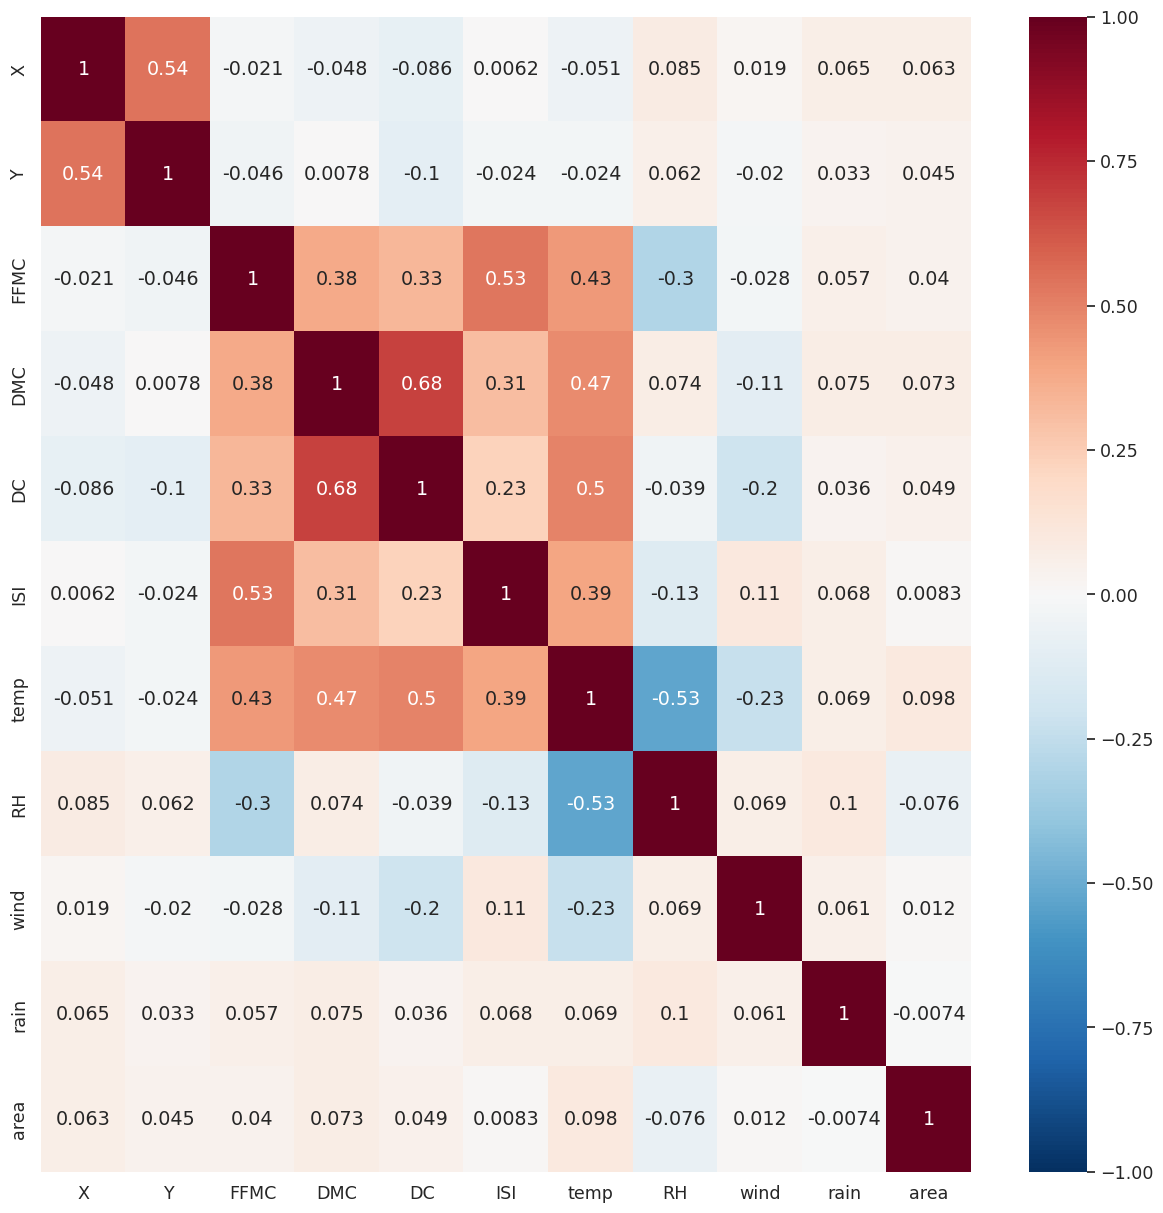

In [21]:
sns.set(font_scale=1.15)
plt.figure(figsize=(15,15))

sns.heatmap(
    df.corr(),        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

## **Multivariate Analysis**

Bivariate analysis allowed us to understand our data slightly better.

In particular, we found a relationship between the months of the year, and the area impacted by fires.

Nevertheless, this did not allow us to make any conclusive hypothesis to predict the number of hectares burned by forest fires.

We then continue our project with the Multivariate Analysis.

**Multivariate analysis is the inspection of several features at the same time by relating them to our target.**

This will allow us to make hypotheses about the dataset.

> We are still in theorizing phase.

**The question associated with Multivariate Analysis is: Is there a link between several of our features and the target?**

If there is a link, for example between temperature, relative humidity (RH) and the target, we can predict the impacted surface.

Indeed, we can imagine that the more the temperature increases, the more the relative humidity (RH) decreases (relation determined thanks to the previous heatmap) and thus that the impacted surface also increases. Therefore we could use a Decision Tree to predict the target!



### **Numerical Features**

Let’s analyze these features now:

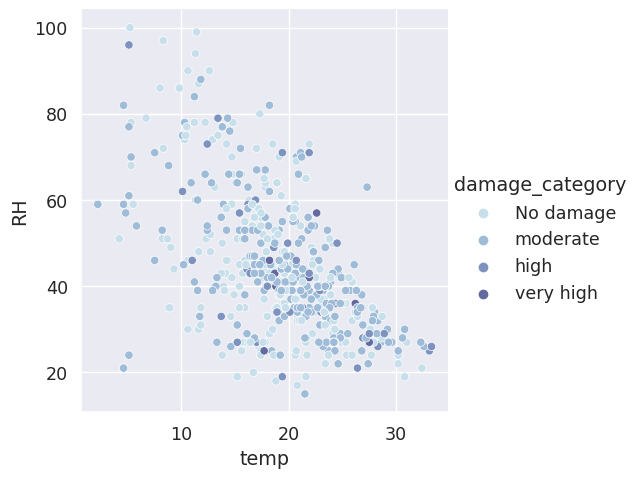

In [22]:
sns.set_palette('ch:s=.25,rot=-.25')
sns.relplot(
    x='temp', 
    y='RH', 
    data=df, 
    #palette='bright',
    kind='scatter', 
    hue='damage_category');

First of all, we confirm the visual link between RH and temperature. Indeed, as the temperature increases, the humidity decreases. However, this does not influence the surface impacted by the fire.

**We see that the damage caused by fire is randomly distributed on the graph.**

Let’s display another relationship. For example between the FFMC and the wind :

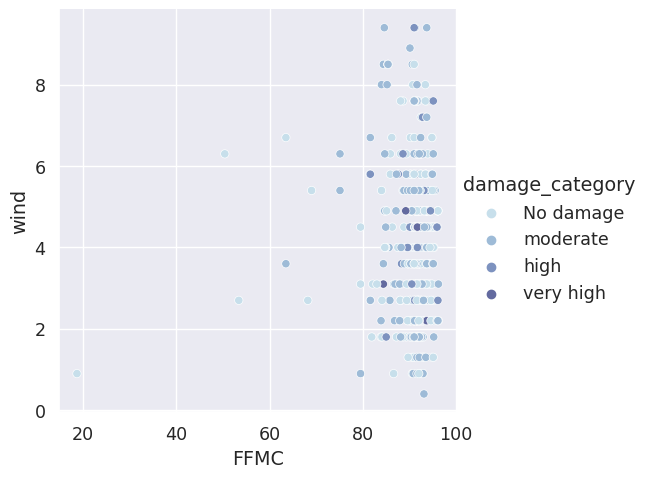

In [23]:
sns.relplot(
    x='FFMC', 
    y='wind', 
    data=df, 
    #palette='bright',
    kind='scatter', 
    hue='damage_category');

Here again no correlation. Neither between wind and FFMC. Nor between these two data and the surface impacted by the fire.

**Instead of displaying these graphs one by one, we can display them all at the same time.**

To do this, we select the numerical features:

In [24]:
selected_features = df.drop(columns=['damage_category','day','month','area']).columns
selected_features

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain'], dtype='object')

Then we display the relationship between each of these features and our target:

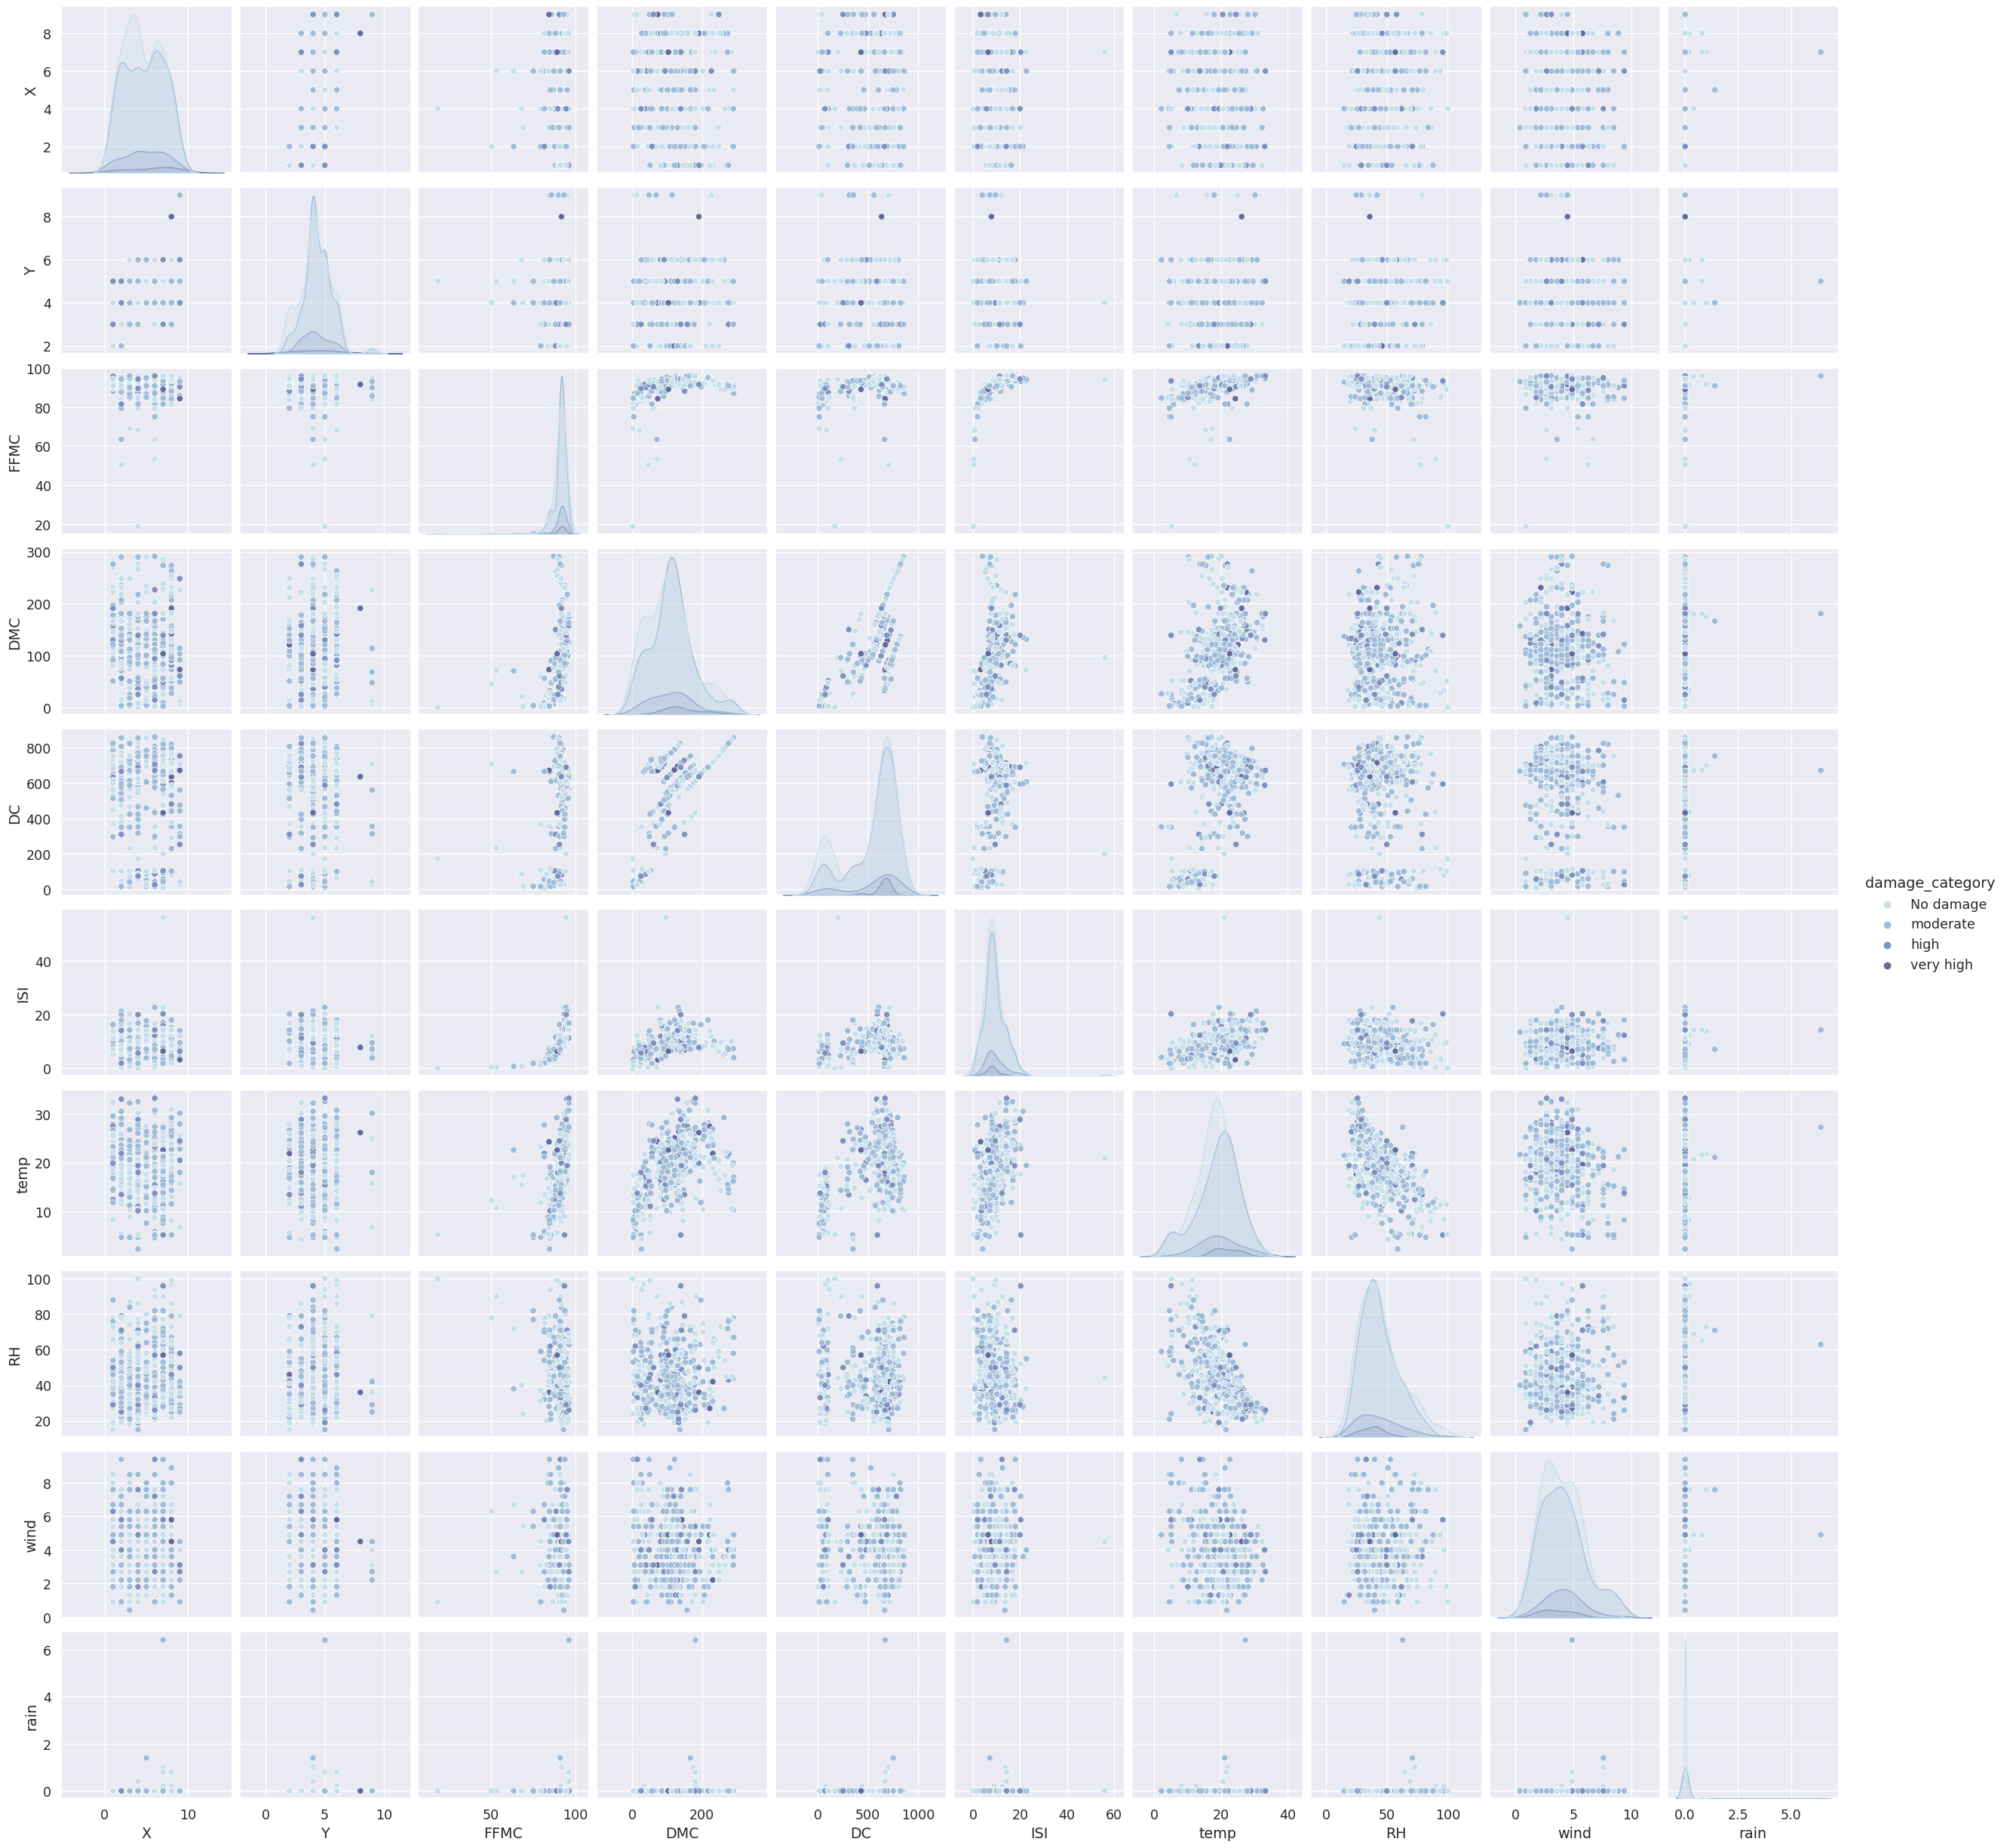

In [25]:
sns.pairplot(df,hue='damage_category',vars=selected_features)
plt.show()

**Do you find any correlations? What to do if so? What to do if not?**

## **Conclusion**

In this article, we’ve used Data Science to analyze the forestfires.csv dataset.

**To understand this dataset we used Exploratory Data Analysis (EDA), namely with the :**

- Univariate
- Bivariate
- Multivariate

You now know the usefulness of each of these analyses.

I invite you to perform this project on your own and share your findings.

**Are the data sufficient to predict the area impacted by fire?**

**Or is there a lack of relevance in our data?**

Both of these conclusions can occur in any data science project and a thorough analysis is needed to determine this.